In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/machine-learning/projects/sentiment-analysis

data  pipeline1.sav  pipeline2.sav  pipeline3.sav  pipeline.sav


In [ ]:
%cd drive/My\ Drive/machine-learning/projects/sentiment-analysis

/content/drive/My Drive/machine-learning/projects/sentiment-analysis


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data/IMDB Dataset.csv')

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [ ]:
cleanup_nums = {"sentiment":     {"positive": 0, "negative": 1}}
df.replace(cleanup_nums, inplace=True)
df.head(10)
              

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
5,"Probably my all-time favorite movie, a story o...",0
6,I sure would like to see a resurrection of a u...,0
7,"This show was an amazing, fresh & innovative i...",1
8,Encouraged by the positive comments about this...,1
9,If you like original gut wrenching laughter yo...,0


In [ ]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
5,"Probably my all-time favorite movie, a story o...",0
6,I sure would like to see a resurrection of a u...,0
7,"This show was an amazing, fresh & innovative i...",1
8,Encouraged by the positive comments about this...,1
9,If you like original gut wrenching laughter yo...,0


In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.15, shuffle =False)

In [ ]:

print(train.shape)
test.shape

(42500, 2)


(7500, 2)

In [ ]:

train.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [ ]:
train['review'].shape

(42500,)

In [ ]:
train['review'] = train['review'].str.replace('\d+', '')
test['review'] = test['review'].str.replace('\d+', '')
train['review'][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


"One of the other reviewers has mentioned that after watching just  Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
!pip install contractions
import contractions

In [ ]:
train['review']=train['review'].apply(lambda x:tokenizer.tokenize(x.lower()))
train.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",0
1,"[a, wonderful, little, production, br, br, the...",0
2,"[i, thought, this, was, a, wonderful, way, to,...",0
3,"[basically, there, s, a, family, where, a, lit...",1
4,"[petter, mattei, s, love, in, the, time, of, m...",0
5,"[probably, my, all, time, favorite, movie, a, ...",0
6,"[i, sure, would, like, to, see, a, resurrectio...",0
7,"[this, show, was, an, amazing, fresh, innovati...",1
8,"[encouraged, by, the, positive, comments, abou...",1
9,"[if, you, like, original, gut, wrenching, laug...",0


In [ ]:
train['review'] = train['review'].apply(lambda x: [contractions.fix(word) for word in x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
stop_words  = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train['review'] = train['review'].apply(lambda x: [item for item in x if item not in stop_words])
train.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",0
1,"[wonderful, little, production, br, br, filmin...",0
2,"[thought, wonderful, way, spend, time, hot, su...",0
3,"[basically, family, little, boy, jake, thinks,...",1
4,"[petter, mattei, love, time, money, visually, ...",0
5,"[probably, time, favorite, movie, story, selfl...",0
6,"[sure, would, like, see, resurrection, dated, ...",0
7,"[show, amazing, fresh, innovative, idea, first...",1
8,"[encouraged, positive, comments, film, looking...",1
9,"[like, original, gut, wrenching, laughter, lik...",0


In [ ]:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [ ]:
def word_lemmatizer(text):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [ ]:
train['review']=train['review'].apply(lambda x:word_lemmatizer(x))
train.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,0
1,wonderful little production br br filming tech...,0
2,thought wonderful way spend time hot summer we...,0
3,basically family little boy jake think zombie ...,1
4,petter mattei love time money visually stunnin...,0


Text(0.5, 1.0, 'The most frequent words generated in Positive Reviews')

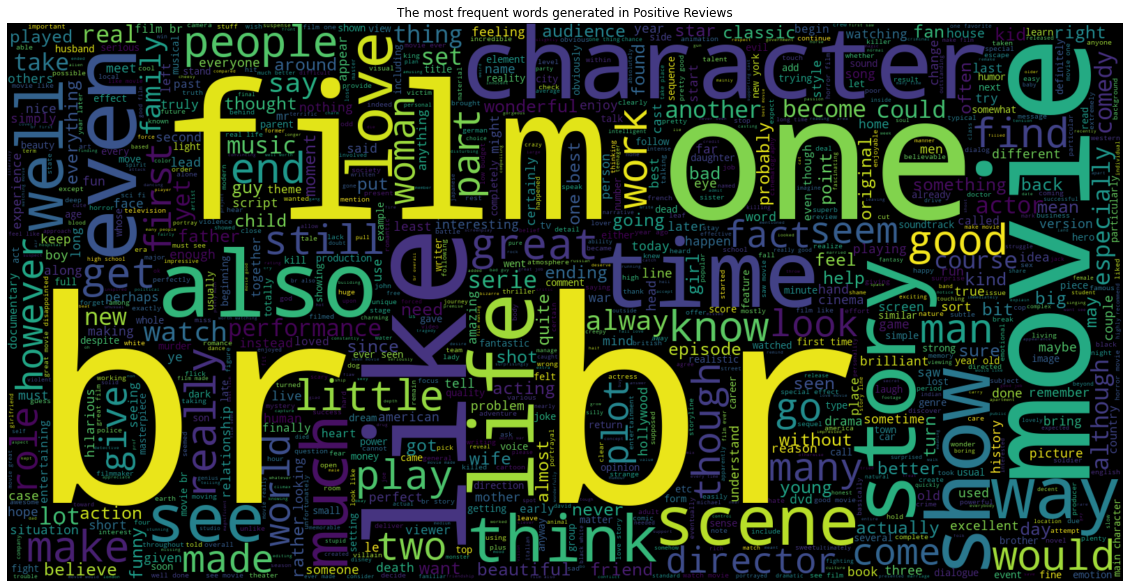

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.sentiment == 0].review))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Positive Reviews")

Text(0.5, 1.0, 'The most frequent words generated in Negative Reviews')

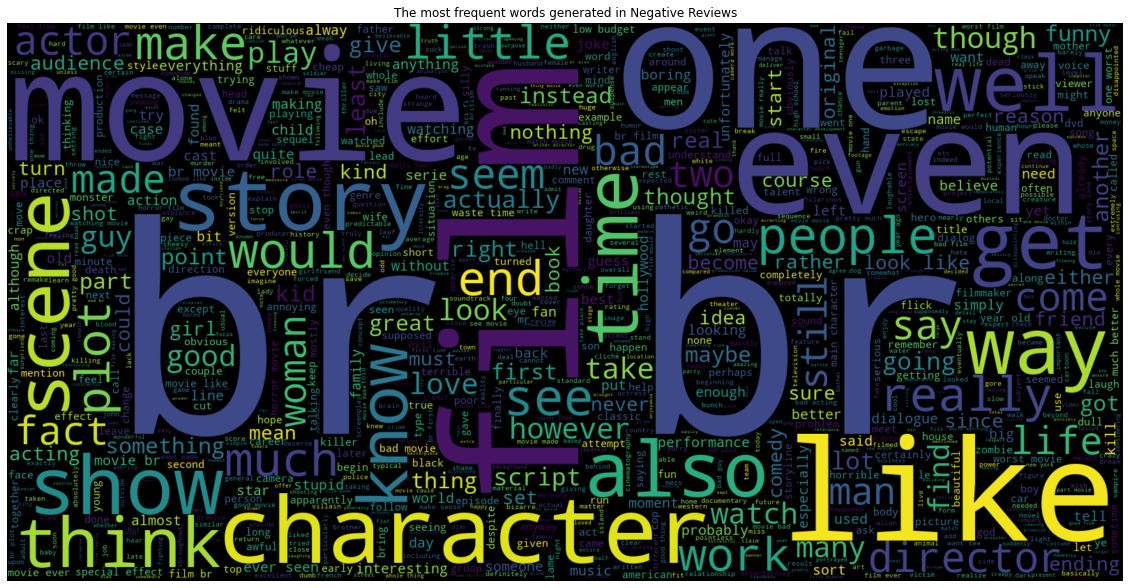

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.sentiment == 1].review))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Negative Reviews")

In [ ]:
x_train = train['review']
y_train = train['sentiment']
x_test = test['review']
y_test = test['sentiment']

print("Size of X_train is ")
print(x_train.shape)
print("Size of Y_train is ")
print(y_train.shape)
print("Size of X_test is ")
print(x_test.shape)
print("Size of Y_test is ")
print(y_test.shape)


Size of X_train is 
(42500,)
Size of Y_train is 
(42500,)
Size of X_test is 
(7500,)
Size of Y_test is 
(7500,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Creating Pipeline
Using **Tf-idf** for vectorizing and **logistic regression** model for predicting 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.85, norm='l2')),
    ('logreg', linear_model.LogisticRegression(C=100, penalty= 'l2', solver='liblinear')),
])


In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logreg',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercep

In [ ]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [ ]:

x_test=x_test.apply(lambda x:tokenizer.tokenize(x.lower()))


In [ ]:

x_test = x_test.apply(lambda x: [item for item in x if item not in stop_words])
x_test= x_test.apply(lambda x:word_lemmatizer(x))

In [ ]:
loaded_model = joblib.load('pipeline.sav')


In [ ]:
y_pred = loaded_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification Report:\n', classification_report(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred)*100)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      3763
           1       0.89      0.88      0.89      3737

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

Confusion Matrix:
 [[3360  403]
 [ 432 3305]]
Accuracy score: 88.86666666666667


In [ ]:
def remove_stopwords(text):
    words=[w for w in text if  not w in stop_words]#to remove stop word such as is,an etc
    return words
def word_lemmatizer(text):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in text])#to convert words like playing to ply etc
    return lem_text

In [ ]:
text="The book was awsome, really loved it. Though its authors debut but it was completely unexprected. really loved the book. The plot was quit intresting and very beautifully written. I am very happy by the author"

In [ ]:
text=tokenizer.tokenize(text)
text=remove_stopwords(text)
text=word_lemmatizer(text)
text

'The book awsome really loved Though author debut completely unexprected really loved book The plot quit intresting beautifully written I happy author'

In [ ]:
loaded_model.predict([text])

array([0])

Now using naive_bayes for classification

In [ ]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
pipeline1 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.85, norm='l2')),
    ('MulNB', naive_bayes.MultinomialNB()),
])

In [ ]:
pipeline1.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('MulNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
#saving the pipeline
filename = 'pipeline1.sav'
joblib.dump(pipeline1, filename)

['pipeline1.sav']

In [ ]:
loaded_model_1 = joblib.load('pipeline1.sav')

In [ ]:
text = "We would like to apologize for your recent experience. We're sorry to hear you were less than satisfied with product."
text=tokenizer.tokenize(text)
text=remove_stopwords(text)
text=word_lemmatizer(text)
text

'We would like apologize recent experience We sorry hear le satisfied product'

In [ ]:
loaded_model_1.predict([text])

array([1])

In [ ]:
y_pred_1 = loaded_model_1.predict(x_test)

In [ ]:
print('Classification Report:\n', classification_report(y_test,y_pred_1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_1))
print("Accuracy score:",accuracy_score(y_test, y_pred_1)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      3763
           1       0.86      0.89      0.87      3737

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

Confusion Matrix:
 [[3214  549]
 [ 429 3308]]
Accuracy score: 86.96000000000001


Now we will be using SVM

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
pipeline2 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.85, norm='l2')),
    ('LinearSvc', svm.LinearSVC()),
])

In [ ]:
pipeline2.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('LinearSvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
   

In [ ]:
#saving the pipeline
filename = 'pipeline2.sav'
joblib.dump(pipeline2, filename)

['pipeline2.sav']

In [ ]:
loaded_model_2 = joblib.load('pipeline2.sav')

In [ ]:
text = "We would like to apologize for your recent experience. We're sorry to hear you were less than satisfied with product."
text=tokenizer.tokenize(text)
text=remove_stopwords(text)
text=word_lemmatizer(text)
text

'We would like apologize recent experience We sorry hear le satisfied product'

In [ ]:
var_sentiment = loaded_model_2.predict([text])
var_sentiment

array([1])

In [ ]:
var_sentiment[0]

1

In [ ]:
y_pred_2 = loaded_model_2.predict(x_test)

In [ ]:
print('Classification Report:\n', classification_report(y_test,y_pred_2))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_2))
print("Accuracy score:",accuracy_score(y_test, y_pred_2)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      3763
           1       0.90      0.90      0.90      3737

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500

Confusion Matrix:
 [[3387  376]
 [ 392 3345]]
Accuracy score: 89.75999999999999


Random Forest Classifier

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
pipeline3 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.85, norm='l2')),
    ('LinearSvc', ensemble.RandomForestClassifier()),
])

In [ ]:
pipeline3.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pat...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
#saving the pipeline
filename = 'pipeline3.sav'
joblib.dump(pipeline3, filename)

['pipeline3.sav']

In [ ]:
loaded_model_3 = joblib.load('pipeline3.sav')

In [ ]:
text="Wordpress is really a great website and very easy to use. Rellay i made the whole website without having any coding ability and i just coudn't beleive that. Thanks to wordpress Team for such a wonderful jpb they did."
text=tokenizer.tokenize(text)
text=remove_stopwords(text)
text=word_lemmatizer(text)
text

'Wordpress really great website easy use Rellay made whole website without coding ability coudn beleive Thanks wordpress Team wonderful jpb'

In [ ]:
loaded_model_3.predict([text])

array([0])

In [ ]:
y_pred_3 = loaded_model_3.predict(x_test)

In [ ]:
print('Classification Report:\n', classification_report(y_test,y_pred_3))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_3))
print("Accuracy score:",accuracy_score(y_test, y_pred_3)*100)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      3763
           1       0.86      0.84      0.85      3737

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

Confusion Matrix:
 [[3263  500]
 [ 582 3155]]
Accuracy score: 85.57333333333334
